인풋되는 이미지에 따라 성능차이 너무 심함.....
preprocessing을 하거나 SURF확인필요

In [1]:
from image_preprocessing import *

In [3]:
#영상 읽어서 그레이 스케일로 변환
img = cv2.imread('/Users/monica_air/Documents/Sign recognition/opencv/SURF/data/fragile_SURF.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 8x8 크기로 축소 ---①
gray = cv2.resize(gray, (16,16))
# 영상의 평균값 구하기 ---②
avg = gray.mean()
# 평균값을 기준으로 0과 1로 변환 ---③
bin = 1 * (gray > avg)
print(bin)

# 2진수 문자열을 16진수 문자열로 변환 ---④
dhash = []
for row in bin.tolist():
    s = ''.join([str(i) for i in row])
    dhash.append('%02x'%(int(s,2)))
dhash = ''.join(dhash)
print(dhash)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1]
 [1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1]
 [1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1]
 [1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0]
 [1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0]
 [1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0]
 [1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]]
ffffffffc0c7e087e847e005e887e00fc00fb00dbc7cbefcbaf8be10a001bc00


In [2]:
# 이미지를 16x16 크기의 평균 해쉬로 변환 ---②
def img2hash(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (16, 16))
    avg = gray.mean()
    bi = 1 * (gray > avg)
    return bi

# 해밍거리 측정 함수 ---③
def hamming_distance(a, b):
    a = a.reshape(1,-1)
    b = b.reshape(1,-1)
    # 같은 자리의 값이 서로 다른 것들의 합
    distance = (a !=b).sum()
    return distance

In [44]:
search_dir = '/Users/monica_air/Desktop/sigle_test/'
img_list = get_img(search_dir)
count_img(search_dir)

이미지수 18


In [49]:
file_name = file_list(search_dir)
file_name.sort()
file_name

['/Users/monica_air/Desktop/sigle_test/dry_1.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_1.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_10.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_2.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_3.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_4.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_5.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_6.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_7.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_8.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_9.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_up_1.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_up_2.png',
 '/Users/monica_air/Desktop/sigle_test/multi_1.png',
 '/Users/monica_air/Desktop/sigle_test/up_1.png',
 '/Users/monica_air/Desktop/sigle_test/up_2.png',
 '/Users/monica_air/Desktop/sigle_test/up_3.png',
 '/Users/monica_air/Desktop/sigle_test/up_4.png']

In [67]:
file_name_list = file_list(search_dir)
file_name_list

['/Users/monica_air/Desktop/sigle_test/dry_1.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_1.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_10.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_2.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_3.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_4.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_5.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_6.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_7.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_8.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_9.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_up_1.png',
 '/Users/monica_air/Desktop/sigle_test/fragile_up_2.png',
 '/Users/monica_air/Desktop/sigle_test/multi_1.png',
 '/Users/monica_air/Desktop/sigle_test/up_1.png',
 '/Users/monica_air/Desktop/sigle_test/up_2.png',
 '/Users/monica_air/Desktop/sigle_test/up_3.png',
 '/Users/monica_air/Desktop/sigle_test/up_4.png']

dry_1.png detected


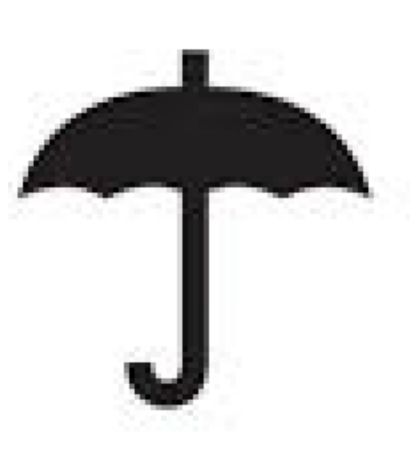

fragile_1.png detected


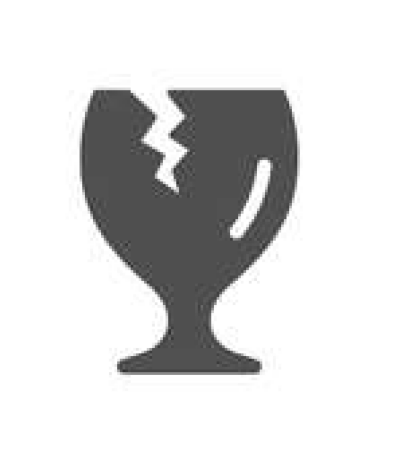

fragile_10.png not fragile
fragile_2.png detected


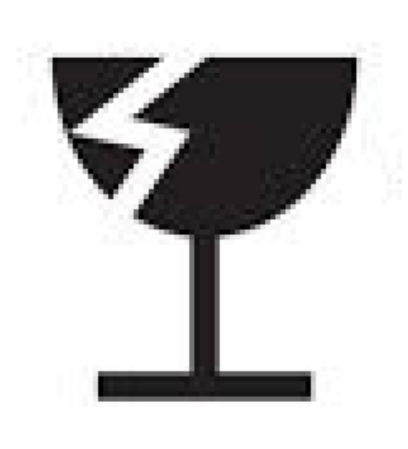

fragile_3.png not fragile
fragile_4.png detected


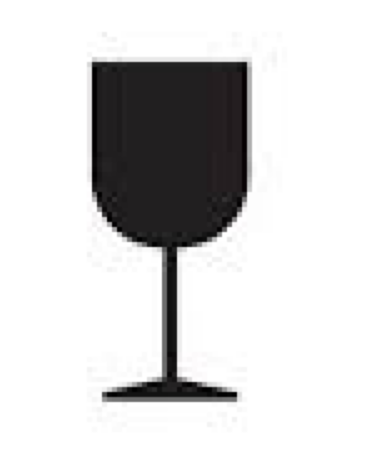

fragile_5.png not fragile
fragile_6.png not fragile
fragile_7.png not fragile
fragile_8.png not fragile
fragile_9.png not fragile
fragile_up_1.png detected


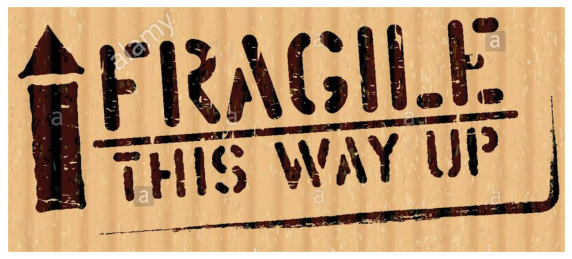

fragile_up_2.png not fragile
multi_1.png not fragile
up_1.png not fragile
up_2.png detected


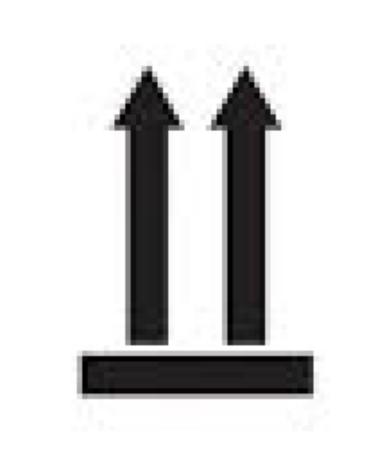

up_3.png not fragile
up_4.png not fragile


In [85]:
for i in file_name_list:
    name = i.split('/')[-1]
    origin_img = INPUT_IMG(i)
    img = img2hash(origin_img)
    hash_img = img.reshape(1,-1)
    dst = (a !=hash_img).sum()
    eval_= dst/256
    if dst/256 < 0.25:
        print(name,'detected')
        origin_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
        show(origin_img)
    else:
        print(name,'not fragile')
